# Projeto #2 - Classificador supervisionado

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) Qual a base escolhida?



# A base escolhida foi - eeg-eye-state (estado de olhos abertos/fechados) -https://www.openml.org/d/1471

### 2) **(10%)** Pré-processamento: entendimento do conjunto de dados
- Quais são minhas features?
- Quais são minhas classes?
- Como estão distribuidas minhas classes?
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [0]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [0]:
#A base tem 15 features: Class, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13 e V14
As features que iniciam com V, representam 14 medições feitas de um video, que auxiliam a verificação de olhos abertos ou fechados. Elas possuem:
V1 - tem 548 valores únicos e nehum valor ausente
V2 - 452 valores únicos e nehum valor ausente
V3 - 345 valores únicos e nehum valor ausente
V4 - 312 valores únicos e nehum valor ausente
V5 - 285 valores únicos e nehum valor ausente
V6 - 330 valores únicos e nehum valor ausente ******
V7 - 290 valores únicos e nehum valor ausente
V8 - 294 valores únicos e nehum valor ausente
V9 - 304 valores únicos e nehum valor ausente
V10 - 346 valores únicos e nehum valor ausente
V11 - 419 valores únicos e nehum valor ausente
V12 - 343 valores únicos e nehum valor ausente
V13 - 558 valores únicos e nehum valor ausente
V14 - 592 valores únicos e nehum valor ausente

In [0]:
#A base possue duas classes, definem se os olhos estão abertos ou fechados,  ou seja, '1' indica o estado de olho fechado e '0' o estado de olho aberto.

In [0]:
# A base possue 14980 registros.

In [0]:
import pandas as pd
import numpy as np


from matplotlib import pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
!ls '/content/gdrive/My Drive/Colab Notebooks/projeto_2'

In [0]:
olhos = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/projeto_2/olhosBD.csv")

In [0]:
olhos[0:3]

In [0]:
olhos.head()

In [0]:
olhos.dtypes

In [0]:
olhos["Class"].unique()

array([1, 2])

In [0]:
olhos.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,1.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,1.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,1.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,1.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,2.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,2.000000


In [0]:
olhos.columns

In [0]:
columns = olhos.columns # 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'Class'



---

**NORMALIZANDO OS DADOS**

In [0]:
olhos.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,1
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,1
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,1


In [0]:
from sklearn import preprocessing

x = olhos.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [0]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.010702,0.236931,0.556326,0.002648,0.515557,0.005053,0.003558,0.027383,0.010837,0.498575,0.264230,0.426286,0.029886,0.004237,0.0
1,0.010687,0.236004,0.557117,0.002649,0.513684,0.005054,0.003559,0.026619,0.010795,0.496148,0.263219,0.426071,0.029865,0.004224,0.0
2,0.010697,0.236416,0.557379,0.002661,0.512514,0.005046,0.003558,0.023390,0.010783,0.495197,0.262931,0.426610,0.029838,0.004231,0.0




---



In [0]:
# avalia a relação entre duas variáveis
olhos.cov()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
V1,6.210424e+06,29898.555734,52543.283903,1.582416e+05,24148.092682,5.800386e+04,7.601653e+04,2959.327723,5.321990e+06,-6713.754515,53956.463993,-40825.983701,3.007473e+06,1.772129e+05,12.962495
V2,2.989856e+04,2110.637271,1190.607511,-5.006825e+04,-400.292214,-5.682232e+03,-4.451345e+04,696.851939,2.600211e+04,854.849007,551.021431,526.734540,1.395229e+04,-1.945873e+04,-1.827941
V3,5.254328e+04,1190.607511,1973.851783,-7.651662e+04,-420.085553,-7.751937e+04,-6.858244e+04,287.963707,4.617742e+04,323.351987,869.511972,215.509696,2.685760e+04,-1.668222e+05,0.859662
V4,1.582416e+05,-50068.248309,-76516.618900,2.721088e+07,91442.386757,1.380550e+05,2.399936e+07,19937.971547,1.474156e+05,-103114.523801,82846.290882,111690.663880,-3.372964e+04,4.952503e+06,-19.538679
V5,2.414809e+04,-400.292214,-420.085553,9.144239e+04,1206.785672,4.158406e+04,8.059164e+04,-30.591988,1.966086e+04,-298.086889,441.274801,-138.406418,1.121244e+04,9.800004e+04,-0.006371
V6,5.800386e+04,-5682.232332,-77519.371837,1.380550e+05,41584.055017,8.554394e+06,1.844514e+05,17834.624160,-7.828398e+04,46802.199798,-21757.583404,-27843.539231,-1.092812e+05,1.702935e+07,-11.412631
V7,7.601653e+04,-44513.453664,-68582.442655,2.399936e+07,80591.635004,1.844514e+05,2.116853e+07,17983.303592,7.508004e+04,-90283.042458,72502.768492,98939.198275,-6.160059e+04,4.492171e+06,-16.530113
V8,2.959328e+03,696.851939,287.963707,1.993797e+04,-30.591988,1.783462e+04,1.798330e+04,858.056602,2.994083e+03,713.782012,479.634412,702.190773,7.253900e+02,3.876413e+04,0.365698
V9,5.321990e+06,26002.109476,46177.419585,1.474156e+05,19660.860654,-7.828398e+04,7.508004e+04,2994.083426,4.564241e+06,-6019.476247,46617.170833,-34227.965074,2.578602e+06,-1.013841e+05,10.175546
V10,-6.713755e+03,854.849007,323.351987,-1.031145e+05,-298.086889,4.680220e+04,-9.028304e+04,713.782012,-6.019476e+03,1447.871190,54.997923,209.758661,-3.782117e+03,7.538380e+04,0.893653


In [0]:
# avalia a relação entre duas variáveis
olhos.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
V1,1.000000,0.261146,0.474569,0.012173,0.278938,0.007958,0.006630,0.040539,0.999607,-0.070801,0.572997,-0.394334,0.998714,0.012070,0.010458
V2,0.261146,1.000000,0.583317,-0.208922,-0.250816,-0.042288,-0.210591,0.517816,0.264922,0.489010,0.317418,0.275977,0.251327,-0.071895,-0.079994
V3,0.474569,0.583317,1.000000,-0.330162,-0.272186,-0.596566,-0.335514,0.221270,0.486506,0.191273,0.517950,0.116761,0.500276,-0.637363,0.038902
V4,0.012173,-0.208922,-0.330162,1.000000,0.504616,0.009049,0.999961,0.130482,0.013228,-0.519498,0.420311,0.515388,-0.005351,0.161155,-0.007531
V5,0.278938,-0.250816,-0.272186,0.504616,1.000000,0.409277,0.504231,-0.030063,0.264913,-0.225508,0.336173,-0.095902,0.267107,0.478852,-0.000369
V6,0.007958,-0.042288,-0.596566,0.009049,0.409277,1.000000,0.013707,0.208167,-0.012528,0.420539,-0.196873,-0.229149,-0.030921,0.988310,-0.007845
V7,0.006630,-0.210591,-0.335514,0.999961,0.504231,0.013707,1.000000,0.133434,0.007638,-0.515699,0.417041,0.517621,-0.011080,0.165730,-0.007223
V8,0.040539,0.517816,0.221270,0.130482,-0.030063,0.208167,0.133434,1.000000,0.047843,0.640387,0.433333,0.577013,0.020493,0.224627,0.025100
V9,0.999607,0.264922,0.486506,0.013228,0.264913,-0.012528,0.007638,0.047843,1.000000,-0.074047,0.577472,-0.385643,0.998849,-0.008055,0.009576
V10,-0.070801,0.489010,0.191273,-0.519498,-0.225508,0.420539,-0.515699,0.640387,-0.074047,1.000000,0.038252,0.132692,-0.082256,0.336282,0.047218


In [0]:
# obter os valores mais comuns do dataset
olhos.mode()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
0,4291.79,4003.59,4263.59,4122.56,4332.31,4616.41,4072.31,4610.77,4196.92,4224.62,4195.38,4273.85,4603.08,4352.31,1


In [0]:
# Ela retornará a mediana de um conjunto numérico ao calcular a média de dois pontos médios, se necessário. 
# Se a quantidade de valores for ímpar, retornará o valor do meio. 
# Se for par, retornará a média dos valores centrais.
olhos.median()

V1       4294.36
V2       4005.64
V3       4262.56
V4       4120.51
V5       4338.97
V6       4617.95
V7       4070.26
V8       4613.33
V9       4199.49
V10      4229.23
V11      4200.51
V12      4276.92
V13      4603.08
V14      4354.87
Class       1.00
dtype: float64

In [0]:
print('Número de linhas e número de colunas:', olhos.shape)

Número de linhas e número de colunas: (14980, 15)


In [0]:
print ('No de dimensões:',olhos.ndim)

No de dimensões: 2


In [0]:
print ('Qtde de elementos',olhos.size)

Qtde de elementos 224700


In [0]:
len(olhos)

14980

In [0]:
# verificando se há dados nulos
olhos.isnull().sum()


In [0]:
#  indica a média dos valores de cada feature separadamente
print(olhos.mean()) 

V1       4321.917777
V2       4009.767694
V3       4264.022433
V4       4164.946326
V5       4341.741075
V6       4644.022379
V7       4110.400160
V8       4616.056904
V9       4218.826610
V10      4231.316200
V11      4202.456900
V12      4279.232774
V13      4615.205336
V14      4416.435832
Class       1.448798
dtype: float64


In [0]:
#  A mediana é o valor que separa a metade superior da metade inferior de uma distribuição de dados, ou o valor no centro da distribuição. 
# Na prática, se o número de observações na distribuição é ímpar, ele é o valor central, e se o número de observações é par, 
# ele será a média das duas observações mais centrais.
print(olhos.median()) 

V1       4294.36
V2       4005.64
V3       4262.56
V4       4120.51
V5       4338.97
V6       4617.95
V7       4070.26
V8       4613.33
V9       4199.49
V10      4229.23
V11      4200.51
V12      4276.92
V13      4603.08
V14      4354.87
Class       1.00
dtype: float64


In [0]:
# 
print(olhos.median()) 

In [0]:
%matplotlib notebook
olhos['Class'].plot()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'V2')

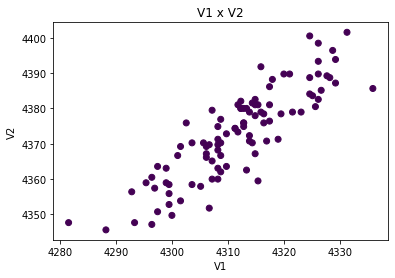

In [0]:
# pré-visualizada nos dados
plt.scatter(olhos.V1[:100],olhos.V14[:100],c=olhos.Class[:100])
plt.title("V1 x V2" )
plt.xlabel('V1')
plt.ylabel('V2')

In [0]:
# binarizando meus dados
olhos = olhos.get_dummies(olhos)

AttributeError: ignored

In [0]:
# visualizar os dados pós binarização
plt.scatter(olhos.V1[:100],olhos.V14[:100],c=olhos.Class[:100])
plt.title("V1 x V2" )
plt.xlabel('V1')
plt.ylabel('V2')

In [0]:
# target são os valores que serão previstos
target = olhos['Class']

In [0]:
# retirar a coluna Class do DataFrame
df = olhos.drop(['Class'],axis=1)

In [0]:
df.columns

NameError: ignored

In [0]:
# selecionar somente a primeira feature
df = df.V1

In [0]:
# importar train_test_split do sklearn para dividir dados de treino e teste
from sklearn.model_selection import train_test_split

In [0]:
# semente aleatória
RANDOM_STATE = 1

In [0]:
# o parâmetro test_size indica o percentual de amostras que serão selecionadas para teste

X_train, X_test, y_train, y_test = train_test_split(df, target, 
                                                    test_size=0.25, # 25% será amostra de teste
                                                    random_state=RANDOM_STATE, stratify=target)

In [0]:
print('Número de linhas e número de colunas:', X_train.shape)

Número de linhas e número de colunas: (11235,)


In [0]:
print('Número de linhas e número de colunas:', y_train.shape)

Número de linhas e número de colunas: (11235,)




---


**REGRESSÃO LINEAR 1**

In [0]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [0]:
#lin_reg.fit(X_train.iloc[:, 0:2].values,y_train) # somente a 1a feature do X_train
lin_reg.fit(X_train,y_train) # somente a 1a feature do X_train


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#pred_train = lin_reg.predict(X_train.iloc[:, 0:2].values) # predição dos dados de treino
pred_train = lin_reg.predict(X_train) # predição dos dados de treino

In [0]:
#pred_test = lin_reg.predict(X_test.iloc[:, 0:2].values) # predição dos dados de teste
pred_test = lin_reg.predict(X_test) # predição dos dados de teste

In [0]:
# depois de feita a regressão, vamos calcular o MSE no treino e no teste
print(np.mean((y_train - pred_train) ** 2))
print(np.mean((y_test - pred_test) ** 2))

0.2269094096420765
0.22398241912309905


In [0]:
# selecionar duas colunas e 100 linhas
X_train_1 = X_train.iloc[:100, 0:1]

In [0]:
X_train.iloc[:100, 0:1]

In [0]:
# selecionar 100 linhas
y_train_1 = y_train.iloc[:100, ]

ValueError: ignored

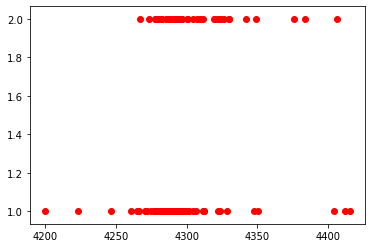

In [0]:
# visualizando o resultado
plt.scatter(X_train_1, y_train_1, color='red')
plt.plot(X_train_1, lin_reg.predict(X_train_1), color='blue')
plt.title('Regressão Linear')
plt.xlabel('V1')
plt.ylabel('Classe')
plt.show()



---


**REGRESSÃO POLINOMIAL**

In [0]:
# ajustando uma regressao polinomial
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train_1)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

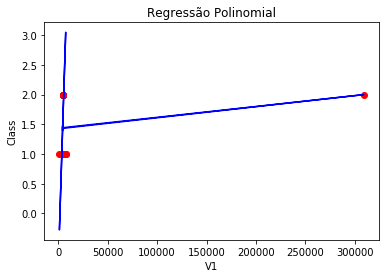

In [0]:
plt.scatter(X_train_1, y_train_1, color='red')
plt.plot(X_train_1, pol_reg.predict(poly_reg.fit_transform(X_train_1)), color='blue')
plt.title('Regressão Polinomial')
plt.xlabel('V1')
plt.ylabel('Class')
plt.show()



---


**CLASSIFICADOR LINEAR 2**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [0]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1]:
y_pred = regressor.predict(X_train)
y_pred

NameError: ignored

In [0]:
#####Metricas#####
print(regressor.intercept_)
print(regressor.coef_)

0.7940261708510579
[ 1.92414375e-04 -3.88545755e-03  3.06353538e-03 -1.47098755e-03
  7.70971213e-03 -1.00485905e-02  1.35027855e-03  6.72008523e-04
  6.05453377e-05  1.99255834e-03 -2.34058769e-03  2.06183136e-03
 -5.19175144e-04  1.71438181e-03]


In [0]:
############## Avaliacao do Modelo ##########

print('R2: ',r2_score(y_train, y_pred)) # ERRO
print('MSE: ',mean_squared_error(y_train, y_pred)) # "Desvio quadrado médio" sempre é não negativo, e valores mais próximos de zero são melhores.
print('RMSE: ',np.sqrt(mean_squared_error(y_train, y_pred)))

R2:  0.08948070451782497
MSE:  0.2252407275683307
RMSE:  0.47459533032714374


In [0]:
print (X_train.shape)

(11235, 14)


In [0]:
print (y_train.shape)

(11235,)


In [0]:
print (y_pred.shape)

(11235,)


In [0]:
X = X_train.iloc[0:100,0:1]
#X_train_1 = olhos.iloc[:, 0:1].values

In [0]:
y = y_train.iloc[0:100,]

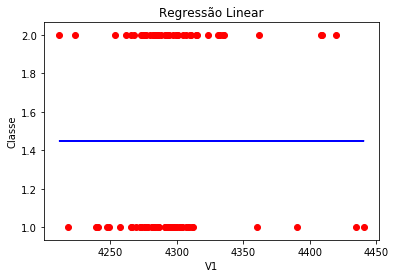

In [0]:
# visualizando o resultado
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X), color='blue')
plt.title('Regressão Linear')
plt.xlabel('V1')
plt.ylabel('Classe')
plt.show()

In [0]:
y_pred[:100]

array([1.46045555, 1.40407741, 1.46132908, 1.22207107, 1.27588116,
       1.39080897, 1.48131164, 1.64257391, 1.39857682, 1.36113275,
       1.28915521, 1.34715083, 1.34753712, 1.33862539, 1.24923266,
       1.43459759, 1.09906378, 1.39702102, 1.53975309, 1.24210918,
       1.64237371, 1.51609783, 1.36717419, 1.41759494, 1.25450721,
       1.39332534, 1.43401053, 1.39031025, 1.19476493, 1.07574878,
       1.70673424, 1.63149815, 1.16153064, 1.13792123, 1.41869898,
       1.3530062 , 1.47617069, 1.5020102 , 1.26681333, 1.25715661,
       1.74263265, 1.81862371, 1.34437951, 1.23608716, 1.38701064,
       1.60724722, 1.32789928, 1.38145756, 1.40405395, 1.41927075,
       1.06076153, 1.39572604, 1.3111294 , 1.48591601, 1.30038965,
       1.6065605 , 1.51749557, 1.39473727, 1.35783643, 1.5418066 ,
       1.26084098, 1.61008645, 1.42661757, 1.469099  , 1.66458795,
       1.20424422, 1.40940187, 1.31098466, 1.40452302, 1.66053769,
       1.28519483, 1.44561512, 1.39516419, 1.56954891, 1.20303

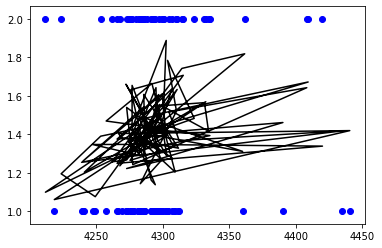

In [0]:
######## Apresentação dos Dados e Modelo ########
plt.scatter(X, y, color ='b') 
plt.plot(X, y_pred[:100], color ='k') 
  
plt.show() 




---



### 3) **(80%)** Nos blocos seguintes implemente seus classificadores (serão implementados 2 métodos diferentes).

#### 3.1) Qual método escolhido?

*Indique o método escolhido*

#### 3.2) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.3) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.4) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.5) Qual método escolhido?

Indique o método escolhido

#### 3.6) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.7) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.8) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

### 5) **(10%)** Conclusões

*Compare seus resultados. Imaginando que sua solução fosse para produção, qual deles você escolheria? Por que? Quais os riscos você enxerga? O que recomendaria de próximos passos para melhorar os resultados?*